In [1]:
import numpy as np
import pandas as pd
from geopandas import GeoDataFrame, read_file, GeoSeries
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import movingpandas as mpd
#from holoviews import opts, dim
import hvplot
import warnings
warnings.simplefilter("ignore")
from geopy.distance import geodesic 
from pyproj import Geod
from shapely.ops import nearest_points
import json
from dtaidistance import dtw_ndim

### Trajectory loading

<Axes: >

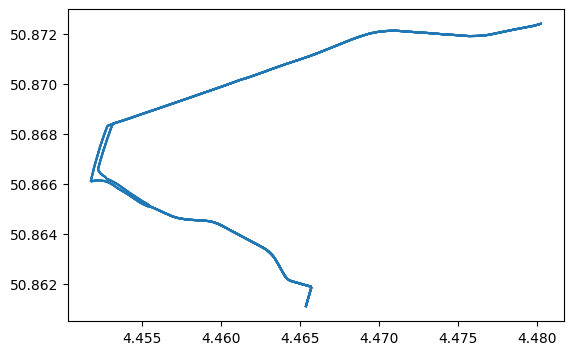

In [29]:
df= pd.read_csv("datasets/cars_8.csv")
traj = mpd.TrajectoryCollection(data=df, traj_id_col='id', t='Timestamp', x='Longitude', y='Latitude')
traj
traj.plot()

In [24]:
segmented = mpd.ObservationGapSplitter(traj).split(gap=timedelta(seconds=1800))
segmented

TrajectoryCollection with 10 trajectories

In [26]:
segmented.to_traj_gdf()

,id,start_t,end_t,geometry,length,direction
0,8_0,2020-06-01 08:56:08.148000,2020-06-01 09:06:08.502019,"LINESTRING (4.46537 50.86107, 4.46539 50.86110...",3419.906046,39.757642
1,8_1,2020-06-01 17:21:58.917000,2020-06-01 17:32:59.884166,"LINESTRING (4.48032 50.87241, 4.48028 50.87240...",3498.486146,219.769236
2,8_2,2020-06-02 08:42:16.224000,2020-06-02 08:52:13.969812,"LINESTRING (4.46537 50.86107, 4.46539 50.86110...",3419.906046,39.757642
3,8_3,2020-06-02 17:57:39.646000,2020-06-02 18:08:33.722622,"LINESTRING (4.48032 50.87241, 4.48028 50.87240...",3498.486146,219.769236
4,8_4,2020-06-03 09:44:32.047000,2020-06-03 09:54:16.925711,"LINESTRING (4.46537 50.86107, 4.46539 50.86110...",3419.906046,39.757642
5,8_5,2020-06-03 16:37:19.364000,2020-06-03 16:48:01.333017,"LINESTRING (4.48032 50.87241, 4.48028 50.87240...",3498.486146,219.769236
6,8_6,2020-06-04 08:03:17.744000,2020-06-04 08:13:17.203116,"LINESTRING (4.46537 50.86107, 4.46539 50.86110...",3419.906046,39.757642
7,8_7,2020-06-04 16:37:58.327000,2020-06-04 16:48:54.113143,"LINESTRING (4.48032 50.87241, 4.48028 50.87240...",3498.486146,219.769236
8,8_8,2020-06-04 20:48:10.522000,2020-06-04 20:51:06.759962,"LINESTRING (4.46537 50.86107, 4.46539 50.86110...",631.623293,312.524363
9,8_9,2020-06-04 21:54:40.677962,2020-06-04 21:57:16.446880,"LINESTRING (4.45963 50.86440, 4.45964 50.86441...",631.623293,132.519909


In [28]:
segmented.hvplot(line_width=5)

:Overlay
   .Tiles.I     :Tiles   [x,y]
   .Path.I      :Path   [Longitude,Latitude]
   .Path.II     :Path   [Longitude,Latitude]
   .Path.III    :Path   [Longitude,Latitude]
   .Path.IV     :Path   [Longitude,Latitude]
   .Path.V      :Path   [Longitude,Latitude]
   .Path.VI     :Path   [Longitude,Latitude]
   .Path.VII    :Path   [Longitude,Latitude]
   .Path.VIII   :Path   [Longitude,Latitude]
   .Path.IX     :Path   [Longitude,Latitude]
   .Path.X      :Path   [Longitude,Latitude]
   .Points.I    :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.II   :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.III  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.IV   :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.V    :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.VI   :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.VII  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.VIII :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.IX   :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.X    :Points   [Longitude,Latitude]   (triangle_angle)